<a href="https://colab.research.google.com/github/z1gyy/Data-Analysis/blob/main/project_credits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


Data description:

Client - number - Unique identifier for the customer holding the account

Attrition_FlagInternal - event (customer activity) variable - if the account is closed then 1 else 0

Customer_AgeDemographic - variable - Customer's Age in Years

GenderDemographic - variable - M=Male, F=Female

Dependent_count - Demographic variable - Number of dependents

Education_Level - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

Marital_Status - Demographic variable - Married, Single, Divorced, Unknown

Income_Category - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)

Card_Category - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

Monthsonbook - Period of relationship with bank

TotalRelationshipCount - Total no. of products held by the customer

MonthsInactive12_mon - No. of months inactive in the last 12 months

ContactsCount12_mon - No. of Contacts in the last 12 months

Credit_Limit - Credit Limit on the Credit Card

TotalRevolvingBal - Total Revolving Balance on the Credit Card

AvgOpenTo_Buy - Open to Buy Credit Line (Average of last 12 months)

TotalAmtChngQ4Q1 - Change in Transaction Amount (Q4 over Q1)

TotalTransAmt - Total Transaction Amount (Last 12 months)

TotalTransCt - Total Transaction Count (Last 12 months)

TotalCtChngQ4Q1 - Change in Transaction Count (Q4 over Q1)

AvgUtilizationRatio - Average Card Utilization Ratio

NaiveBayesClassifierAttritionFlagCardCategoryContactsCount12monDependentcountEducationLevelMonthsInactive12mon_1 - Naive Bayes

NaiveBayesClassifierAttritionFlagCardCategoryContactsCount12monDependentcountEducationLevelMonthsInactive12mon_2 - Naive Bayes

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/z1gyy/Data-Analysis/main/BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


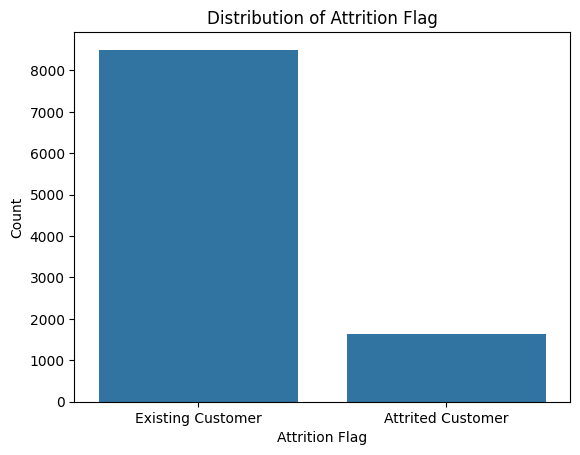

In [38]:
sns.countplot(data=df, x='Attrition_Flag')
plt.title('Distribution of Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.show()

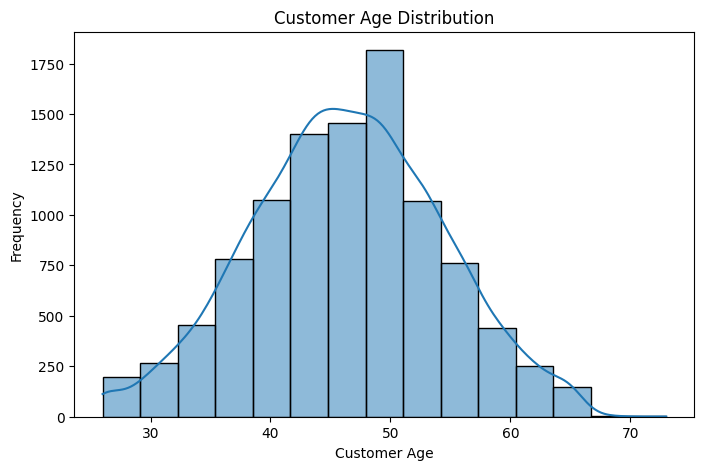

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Customer_Age'], bins=15, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

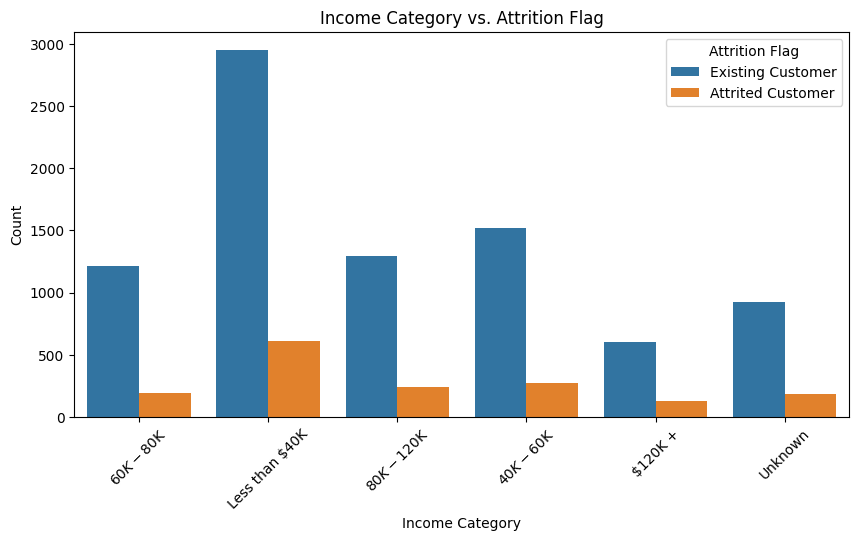

In [40]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Income_Category', hue='Attrition_Flag')
plt.title('Income Category vs. Attrition Flag')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition Flag')
plt.show()

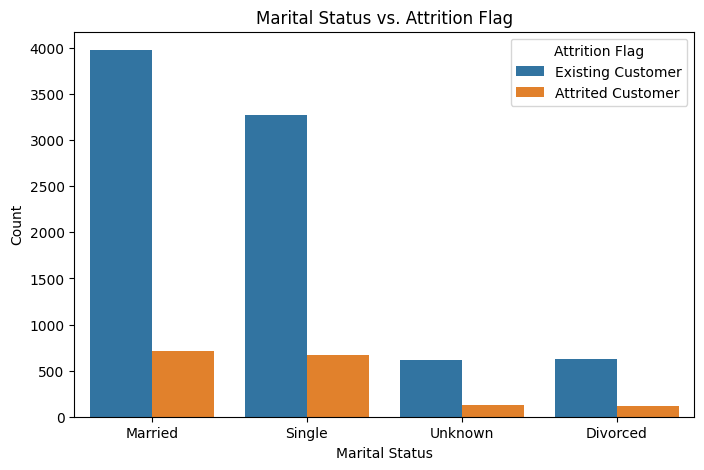

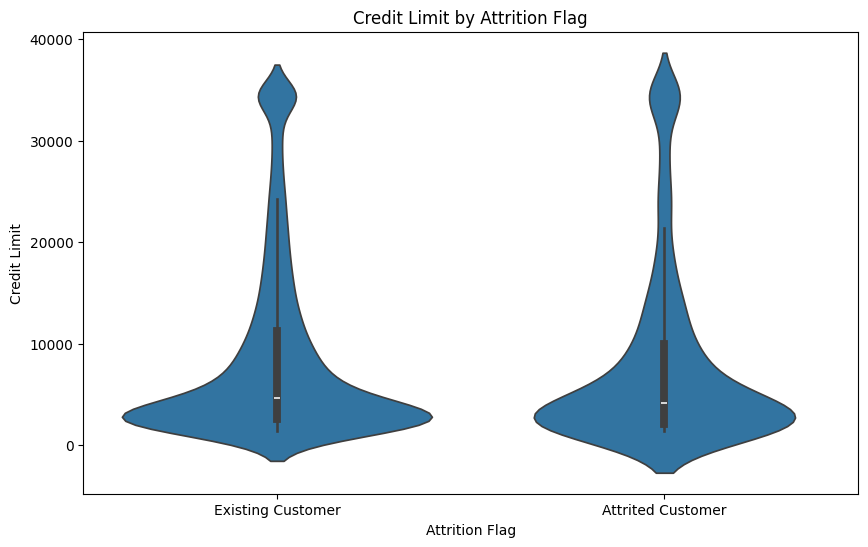

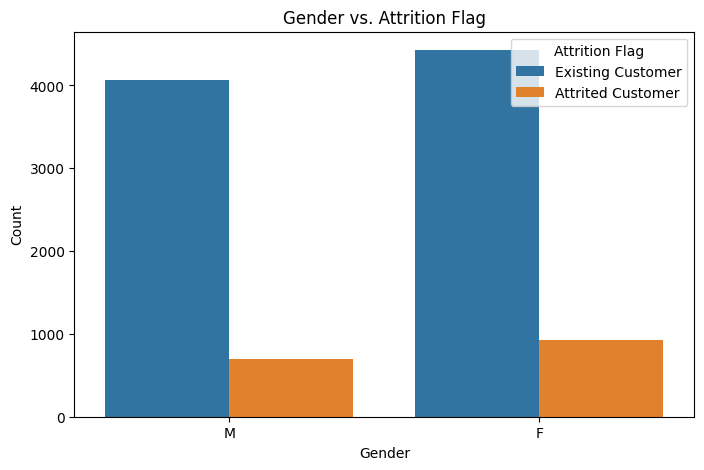

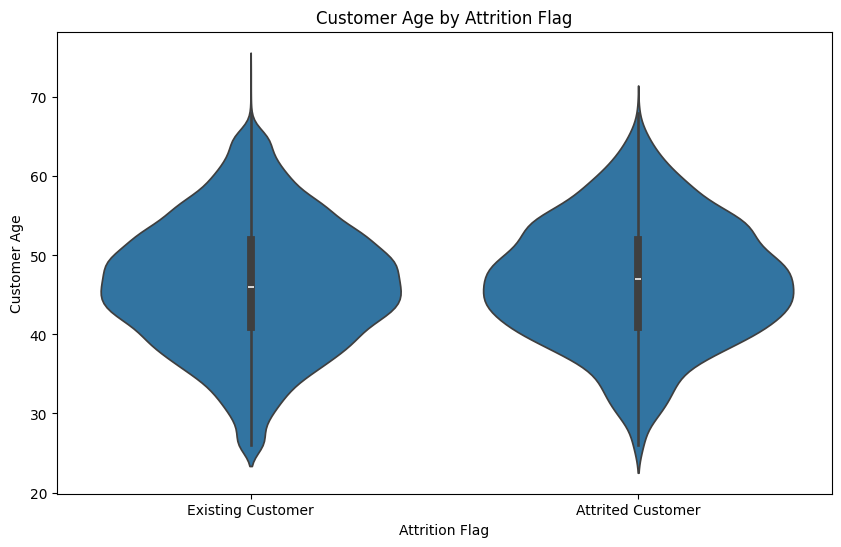

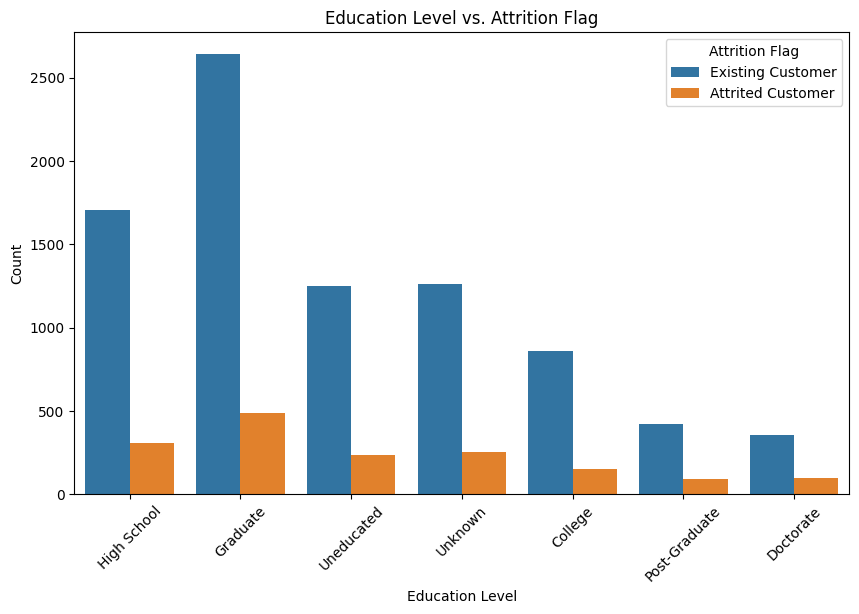

In [41]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Marital_Status', hue='Attrition_Flag')
plt.title('Marital Status vs. Attrition Flag')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Attrition Flag')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Attrition_Flag', y='Credit_Limit')
plt.title('Credit Limit by Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Credit Limit')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Attrition_Flag')
plt.title('Gender vs. Attrition Flag')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition Flag')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Attrition_Flag', y='Customer_Age')
plt.title('Customer Age by Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Customer Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education_Level', hue='Attrition_Flag')
plt.title('Education Level vs. Attrition Flag')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition Flag')
plt.show()

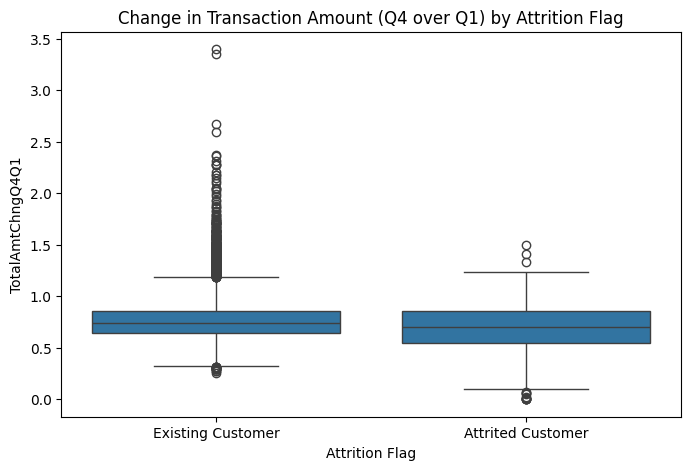

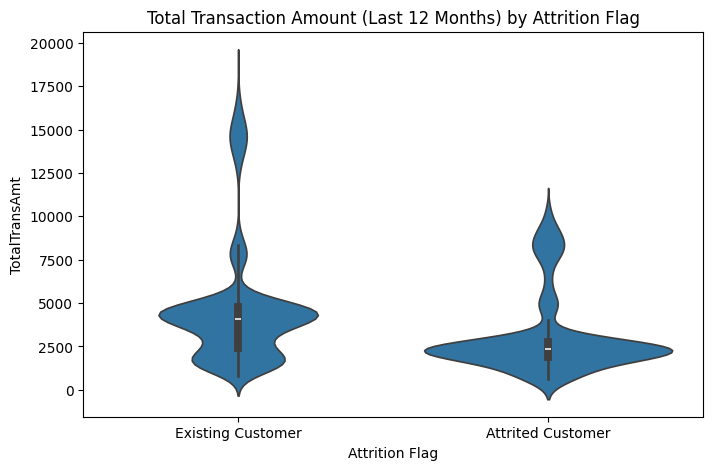

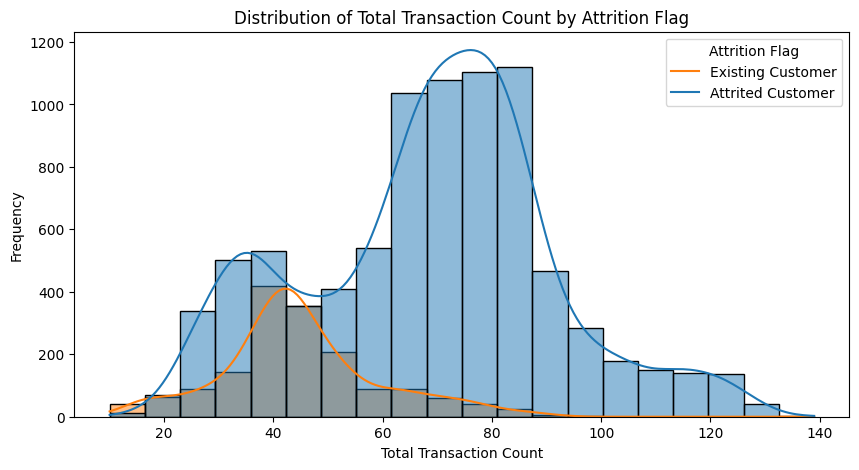

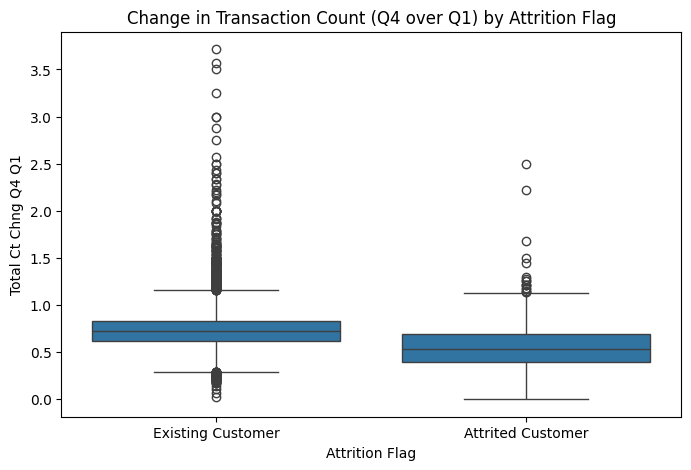

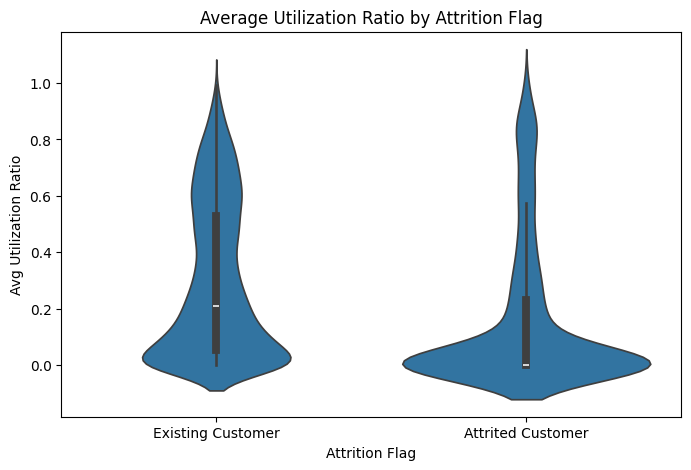

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1')
plt.title('Change in Transaction Amount (Q4 over Q1) by Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('TotalAmtChngQ4Q1')
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Attrition_Flag', y='Total_Trans_Amt')
plt.title('Total Transaction Amount (Last 12 Months) by Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('TotalTransAmt')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Total_Trans_Ct', hue='Attrition_Flag', bins=20, kde=True)
plt.title('Distribution of Total Transaction Count by Attrition Flag')
plt.xlabel('Total Transaction Count')
plt.ylabel('Frequency')

plt.legend(title='Attrition Flag', labels=['Existing Customer', 'Attrited Customer'], loc='upper right')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1')
plt.title('Change in Transaction Count (Q4 over Q1) by Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Total Ct Chng Q4 Q1')
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Attrition_Flag', y='Avg_Utilization_Ratio')
plt.title('Average Utilization Ratio by Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Avg Utilization Ratio')
plt.show()


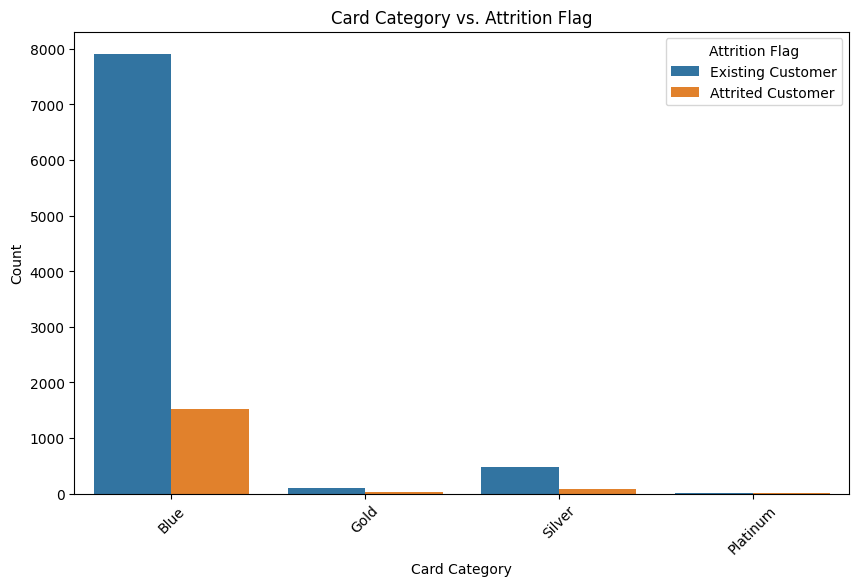

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Card_Category', hue='Attrition_Flag')
plt.title('Card Category vs. Attrition Flag')
plt.xlabel('Card Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition Flag')
plt.show()

#Preprocessing Pipeline Description:
The preprocessing pipeline for this dataset involves multiple steps tailored to handle both numerical and categorical features. Below is a description of the operations performed on each feature type and how the data is processed:

#1. Numerical Features:
The following numerical features are identified:

Customer_Age, Dependent_count, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio
For numerical features, the following steps are applied:

Imputation: Missing values are imputed using the mean of each feature.
Scaling: Standard scaling is performed on the data. StandardScaler standardizes the data by removing the mean and scaling to unit variance. This helps in normalizing the data and ensures that no feature dominates the others during model training, particularly when using algorithms sensitive to feature magnitudes like Decision Trees or Neural Networks.

#2. Categorical Features:
The following categorical features are identified:

Gender, Education_Level, Marital_Status, Income_Category, Card_Category
For categorical features, the following steps are applied:

Imputation: Missing values are imputed with the most frequent category. This is useful when there are any missing entries in these categorical columns.
One-Hot Encoding: One-hot encoding is applied to transform categorical features into a format suitable for machine learning algorithms. Each category in a feature is converted into a new binary (0 or 1) column, representing the presence or absence of the category in the original feature.
#3. Pipeline Composition:
The preprocessing steps for numerical and categorical features are composed into separate pipelines:

Numerical Pipeline: Includes SimpleImputer for handling missing values and StandardScaler for scaling.
Categorical Pipeline: Includes SimpleImputer for handling missing values and OneHotEncoder for encoding categorical variables.
These pipelines are combined using ColumnTransformer:

The ColumnTransformer applies the numerical pipeline to numerical features and the categorical pipeline to categorical features.

#4. Resampling:
Since the dataset is imbalanced, the SMOTE (Synthetic Minority Over-sampling Technique) algorithm is used to balance the dataset by generating synthetic examples of the minority class. The dataset is resampled to have an equal distribution of Attrited Customer and Existing Customer labels, improving the model's ability to generalize to both classes.

In [44]:
attrition_map = {'Existing Customer': 0, 'Attrited Customer': 1}
df['Attrition_Flag'] = df['Attrition_Flag'].map(attrition_map)

df.drop(['CLIENTNUM'], axis=1, inplace=True)

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

numeric_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(
    preprocessor.fit_transform(X_train), y_train
)

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42, max_iter=500)
}
results = {}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=kfold, scoring='f1')
    results[name] = scores
    print(f"{name} Cross-Validation F1-Scores: {scores}")
    print(f"{name} Mean F1-Score: {scores.mean():.2f}\n")

Decision Tree Cross-Validation F1-Scores: [0.9476787  0.9443631  0.94939934 0.95307385 0.95276163]
Decision Tree Mean F1-Score: 0.95

Random Forest Cross-Validation F1-Scores: [0.98346196 0.97877013 0.97580645 0.98205785 0.97954711]
Random Forest Mean F1-Score: 0.98

MLP Cross-Validation F1-Scores: [0.96839811 0.97018182 0.96820809 0.96701704 0.97219213]
MLP Mean F1-Score: 0.97



In [45]:
max_depths = [3, 5, 10, 20]
criterions = ['gini', 'entropy']

pipeline = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier(random_state=42))
])

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for depth in max_depths:
    for criterion in criterions:
        pipeline.set_params(classifier__max_depth=depth, classifier__criterion=criterion)

        scores = cross_val_score(pipeline, X_train_resampled, y_train_resampled, cv=stratified_kfold, scoring='f1')

        mean_score = np.mean(scores)
        results.append((depth, criterion, mean_score))

results_df = pd.DataFrame(results, columns=['Max Depth', 'Criterion', 'Mean F1 Score'])

print(results_df)

   Max Depth Criterion  Mean F1 Score
0          3      gini       0.861770
1          3   entropy       0.860552
2          5      gini       0.918557
3          5   entropy       0.915012
4         10      gini       0.949156
5         10   entropy       0.946518
6         20      gini       0.949878
7         20   entropy       0.952779


In [46]:
rf_results = []

rf_params_list = [
    {'classifier__n_estimators': 50, 'classifier__max_depth': 5, 'classifier__criterion': 'gini'},
    {'classifier__n_estimators': 50, 'classifier__max_depth': 5, 'classifier__criterion': 'entropy'},
    {'classifier__n_estimators': 100, 'classifier__max_depth': 10, 'classifier__criterion': 'gini'},
    {'classifier__n_estimators': 100, 'classifier__max_depth': 10, 'classifier__criterion': 'entropy'},
    {'classifier__n_estimators': 200, 'classifier__max_depth': 20, 'classifier__criterion': 'gini'},
    {'classifier__n_estimators': 200, 'classifier__max_depth': 20, 'classifier__criterion': 'entropy'}
]

rf_pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])

for params in rf_params_list:
    rf_pipeline.set_params(**params)
    scores = cross_val_score(rf_pipeline, X_train_resampled, y_train_resampled, cv=stratified_kfold, scoring='f1')
    mean_score = np.mean(scores)
    rf_results.append((params['classifier__n_estimators'], params['classifier__max_depth'], params['classifier__criterion'], mean_score))

rf_results_df = pd.DataFrame(rf_results, columns=['N Estimators', 'Max Depth', 'Criterion', 'Mean F1 Score'])
print(rf_results_df)

   N Estimators  Max Depth Criterion  Mean F1 Score
0            50          5      gini       0.928685
1            50          5   entropy       0.928453
2           100         10      gini       0.972005
3           100         10   entropy       0.971702
4           200         20      gini       0.980597
5           200         20   entropy       0.980163


In [47]:
mlp_results = []

mlp_params_list = [
    {'classifier__hidden_layer_sizes': (30,), 'classifier__activation': 'tanh', 'classifier__solver': 'adam', 'classifier__alpha': 0.0001, 'classifier__learning_rate': 'constant'},
    {'classifier__hidden_layer_sizes': (30,), 'classifier__activation': 'relu', 'classifier__solver': 'sgd', 'classifier__alpha': 0.001, 'classifier__learning_rate': 'adaptive'},
]

mlp_pipeline = Pipeline(steps=[
    ('classifier', MLPClassifier(random_state=42, max_iter=1000))
])

for params in mlp_params_list:
    mlp_pipeline.set_params(**params)
    scores = cross_val_score(mlp_pipeline, X_train_resampled, y_train_resampled, cv=stratified_kfold, scoring='f1')
    mean_score = np.mean(scores)
    mlp_results.append((params['classifier__hidden_layer_sizes'], params['classifier__activation'], params['classifier__solver'], params['classifier__alpha'], params['classifier__learning_rate'], mean_score))

mlp_results_df = pd.DataFrame(mlp_results, columns=['Hidden Layer Sizes', 'Activation', 'Solver', 'Alpha', 'Learning Rate', 'Mean F1 Score'])
print(mlp_results_df)

  Hidden Layer Sizes Activation Solver   Alpha Learning Rate  Mean F1 Score
0              (30,)       tanh   adam  0.0001      constant       0.969038
1              (30,)       relu    sgd  0.0010      adaptive       0.934374


In [48]:
print("DecisionTreeClassifier")
print(results_df)
print()

print("RandomForestClassifier")
print(rf_results_df)
print()

print("MLPClassifier")
print(mlp_results_df)
print()

DecisionTreeClassifier
   Max Depth Criterion  Mean F1 Score
0          3      gini       0.861770
1          3   entropy       0.860552
2          5      gini       0.918557
3          5   entropy       0.915012
4         10      gini       0.949156
5         10   entropy       0.946518
6         20      gini       0.949878
7         20   entropy       0.952779

RandomForestClassifier
   N Estimators  Max Depth Criterion  Mean F1 Score
0            50          5      gini       0.928685
1            50          5   entropy       0.928453
2           100         10      gini       0.972005
3           100         10   entropy       0.971702
4           200         20      gini       0.980597
5           200         20   entropy       0.980163

MLPClassifier
  Hidden Layer Sizes Activation Solver   Alpha Learning Rate  Mean F1 Score
0              (30,)       tanh   adam  0.0001      constant       0.969038
1              (30,)       relu    sgd  0.0010      adaptive       0.934374



# Explanation of Parameters and Their Effects on Model Performance

## DecisionTreeClassifier
- **Max Depth**: This parameter controls the maximum depth of the tree. Increasing the depth allows the model to capture more complex patterns in the data, but it can also lead to overfitting.  
  - Example: At depth 3, the mean F1 score is ~0.86, but increasing it to 10 or 20 significantly improves the F1 score to ~0.95. However, beyond a certain point, deeper trees may not add significant value and could increase the risk of overfitting.

- **Criterion**: This parameter defines the function to measure the quality of a split. The options are:  
  - **Gini**: Measures impurity based on the probability of incorrect classification.  
  - **Entropy**: Measures impurity using information gain.  
  - Both Gini and Entropy yield similar F1 scores across depths, with marginal differences.

## RandomForestClassifier
- **N Estimators**: The number of trees in the forest. Increasing this value typically improves performance as it reduces variance and improves model stability.  
  - Example: With 200 estimators, the F1 score (~0.98) is higher compared to 50 estimators

- **Max Depth**: Similar to Decision Trees, this controls the maximum depth of each tree. Deeper trees allow for learning more complex patterns.  
  - Example: Increasing the max depth from 5 to 20 improves the F1 score significantly (~0.93 to ~0.98).

- **Criterion**: Similar to Decision Trees, both Gini and Entropy perform similarly, with minor variations.

## MLPClassifier (Neural Network)
- **Hidden Layer Sizes**: Defines the number of neurons in the hidden layers. A larger network can learn more complex patterns, but it may require more data and computational power.  
  - Example: A single hidden layer with 30 neurons achieves excellent performance (~0.96).

- **Activation**: Determines the activation function for the hidden layers.  
  - **Tanh**: Works well in this case, achieving higher F1 scores (~0.96).  
  - **ReLU**: Slightly underperforms compared to Tanh in this configuration (~0.93). ReLU is generally faster to compute but may struggle with small datasets.

- **Solver**: Optimization algorithm used for weight updates.  
  - **Adam**: Performs well for complex networks and achieves the best F1 score (~0.96).  
  - **SGD**: Slower and achieves slightly lower F1 scores (~0.93), though it can be effective with tuning.

- **Alpha**: Regularization parameter to prevent overfitting. Smaller alpha values encourage the model to fit the data closely, while larger values reduce overfitting.  
  - Example: Alpha = 0.0001 yields better performance compared to 0.001 in this case.

- **Learning Rate**: Controls the step size in the optimization process.  
  - **Constant**: Keeps the learning rate fixed and works well with Adam in this experiment (~0.96).  
  - **Adaptive**: Adjusts the learning rate dynamically and works well with SGD (~0.93).


#Most Interesting Insight:
The Random Forest Classifier, with 200 estimators and a depth of 20, achieved the best balance of precision and recall, making it a powerful tool for identifying at-risk customers.

#Model Comparison:

The Random Forest Classifier achieves the best performance with a Mean F1 Score of ~0.98 for configurations using 200 estimators and a max depth of 20.
The MLPClassifier (Neural Network) is also highly effective, achieving a Mean F1 Score of ~0.97 with a single hidden layer of 30 neurons, tanh activation, and the adam solver.
The Decision Tree Classifier performs well for simpler configurations, with the highest Mean F1 Score of ~0.95 at a max depth of 20 and entropy criterion.

#Attribute Importance:

Attributes like Total Transaction Count, Average Utilization Ratio, and Change in Transaction Amount (Q4 over Q1) are strong predictors of customer churn.
Categorical variables like Card Category, Income Category, and Marital Status provide additional information but contribute less compared to numerical features.